In [1]:
#Download mnist data set
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
#Load MNIST 
(X_train, y_train),(X_test,y_test)= mnist.load_data()

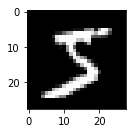

In [5]:
#plot images in gray scale as example
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.show()

In [7]:
#Import functions to form baseline model with multi-layer perceptrons
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [8]:
# reduce 28x28 images to 784 pixel input values use reshape function
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [9]:
# scale and normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [10]:
#transforming the vector of class integers into a binary matrix use one hot encode
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [12]:
#define model in a function for easy further testing
# define baseline model (a single layer perceptron)
def baseline_model():
#Create model
    model = Sequential()
    #One hidden layer with same amount of neurons as input
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    #Use softmax activation function to output layer to turn output as probability
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
#Compile model
    #Logarithmic loss is used as the loss function (called categorical_crossentropy in Keras) 
    #and the efficient ADAM gradient descent algorithm is used to learn the weights.
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [13]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.2771 - accuracy: 0.9221 - val_loss: 0.1416 - val_accuracy: 0.9573
Epoch 2/10
 - 7s - loss: 0.1095 - accuracy: 0.9686 - val_loss: 0.0946 - val_accuracy: 0.9731
Epoch 3/10
 - 7s - loss: 0.0712 - accuracy: 0.9792 - val_loss: 0.0759 - val_accuracy: 0.9761
Epoch 4/10
 - 7s - loss: 0.0492 - accuracy: 0.9856 - val_loss: 0.0704 - val_accuracy: 0.9777
Epoch 5/10
 - 6s - loss: 0.0352 - accuracy: 0.9904 - val_loss: 0.0627 - val_accuracy: 0.9802
Epoch 6/10
 - 6s - loss: 0.0266 - accuracy: 0.9929 - val_loss: 0.0664 - val_accuracy: 0.9794
Epoch 7/10
 - 6s - loss: 0.0198 - accuracy: 0.9948 - val_loss: 0.0664 - val_accuracy: 0.9782
Epoch 8/10
 - 6s - loss: 0.0147 - accuracy: 0.9967 - val_loss: 0.0579 - val_accuracy: 0.9821
Epoch 9/10
 - 6s - loss: 0.0102 - accuracy: 0.9979 - val_loss: 0.0572 - val_accuracy: 

In [14]:
#Import for CNN
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [38]:
def CNN_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [37]:
# reshape to be [samples][width][height][channels] for convolution 2D
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [39]:
# build the model
model = CNN_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
 - 41s - loss: 0.2326 - accuracy: 0.9328 - val_loss: 0.0710 - val_accuracy: 0.9793
Epoch 2/2
 - 48s - loss: 0.0698 - accuracy: 0.9794 - val_loss: 0.0444 - val_accuracy: 0.9867
CNN Error: 1.33%
